# COGS 118A - Final Project

# Classifying Stroke Patients Using SVM, Random Forrest, and a Deep Neural Network

# Names

- Dominik Zeman
- Ryan Kan
- Himanshi Gupta

# Abstract 

Having a stroke is an incredibly serious health condition that is among one of the leading causes of death worldwide. In this project, we will focus on building a machine learning model that predicts an individual's risk of stroke throughout their lifetime. Timely intervention and detection of strokes in people is important as changing lifestyle habits severely decreases an individual's chances of having a stroke. Thus, this project aims to develop a stroke predictor which can help high-risk people better understand their chances of having a stroke and take preventive measures. We are going to use data collected by the CDC that tracks diabetes, hypertension, and stroke conditions in roughly 70,000 patients. We will evaluate the performance of our model using metrics such as sensitivity, specificity, and accuracy. The project’s outcome can be used in the healthcare industry to identify high-risk people and thus provide preventive measures early on in order to decrease the chances of a stroke occurring.

# Background

Strokes are the leading cause for long term disability and death in the world. According to the CDC every 40 sec someone in the USA has a stroke <a name="cdc"></a>[<sup>[1]</sup>](#cdcnote). This staggering statistic emphasizes the need for early intervention for people with high risk for stroke. Another reason a stroke risk predictor can be a useful tool is that billions of dollars are lost every year due to this epidemic. Between 2017 to 2018, the United States of America lost 53 billion dollars because of stroke-related costs <a name="cdc"></a>[<sup>[1]</sup>](#cdcnote). Implementing preventive measures early on is crucial. A deep learning model to predict stroke mortality in patients was proposed by Seong et al., however, they had indirect and limited data and they weren’t able to use their model for people who already suffer from stroke, reducing the accuracy of their model. Virani et. al. at the American Heart Association found that the leading indicators for stroke are Cardiovascular Health, Tobacco Use, Physical Inactivity, Nutrition, and many other indicators which are traits in the dataset we would use to train this model <a name="virani"></a>[<sup>[2]</sup>](#viraninote). Deep Learning has been a method that has been used for evaluating and predicting stroke patients' health conditions for a while, such as the study by Cheon et al. which demonstrated that mortality predictions could be accurately modeled based on the characteristics of the patients who suffered a stroke <a name="cheon"></a>[<sup>[3]</sup>](#cheonnote). In addition, studies have been conducted to test which machine learning models perform the best when predicting whether or not a patient has a stroke. For example, a study done by Alanazi et. al. concluded that random forest prediction gave the most accurate results <a name="alanzi"></a>[<sup>[4]</sup>](#alanzinote). Given the gravity of the topic of strokes and the research that has been done on it specifically in machine learning, we as students hope to contribute and learn from what has been done.

# Problem Statement

In this project, we aim to develop a machine learning model to predict the risk of stroke in an individual based on their demographic data, lifestyle habits, and clinical measurements. To accomplish this, we will be comparing and contrasting three different models: Neural Network, Support Vector Machines (SVM), and Random Forest. We will train each of these models using different lifestyle attributes as input parameters, which will result in the models outputting a probability of the patient suffering a stroke. We will then use a threshold of 0.5 to classify the data into strokes and not strokes and generate a confusion matrix to evaluate the models' performance. The resulting model can be used not only to analyze stroke risk factors but also as a tool for individuals to enter their characteristics and determine their likelihood of having a stroke.

# Data

- We will be using the Diabetes, Hypertension, and Stroke Prediction dataset from Kaggle<a name="kaggle"></a>[<sup>[5]</sup>](#kagglenote) which comprises 18 observations and 70.7k variables. 

- The observations include Age, Sex, High Cholesterol, Cholesterol Check, BMI, Smoker, Heart Disease or Attack, Physical Activity, Fruits, Veggies, Heavy Alcohol Consumption, General Health, Mental Health, Physical Health, Difficulty Walking, Stroke, High Blood Pressure, and Diabetes.

- The critical variables in the observations are High Cholesterol, Heart Disease or Attack, Stroke, and High Blood Pressure, which are represented as binary values (0 or 1) to indicate the presence or absence of a condition.

- To deal with the categorical features, we plan to use one-hot-encoding, while the numerical features will be normalized to address class imbalance issues in the dataset.


Dataset Source:
https://www.kaggle.com/datasets/prosperchuks/health-dataset

This dataset contains:
- 18 Variables
- 70692 Observations (Patients)
- The dataset concsists of a cleaned version of 253,680 survey responses to the CDC's BRFSS2015 and therefore does not contain any NaN values
- All of these variables are important in determining whether a person is at a high risk of suffering a stroke

- The variables observed and their data types are:
    - Nominal:
        - Sex [1, 0] --> [M, F]
        - High Cholesterol [1,0] --> [Yes, No]
        - CholesterolCheck [1,0] --> [Yes, No]
        - Smoker [1, 0] --> [Yes, No]
        - Heart Diseaseor Attack [1 ,0] --> [Yes, No]
        - Physical Activity [1,0] --> [Yes, No]
        - Fruits [1, 0] --> [Yes, No]
        - Veggies [1, 0] --> [Yes, No]
        - Heavy Alcohol Consumption [1,0] --> [Yes, No]
        - Difficulty Walking [1,0] --> [Yes, No]
        - Stroker [1, 0] --> [Yes, No]
        - High Blood Pressure [1, 0] --> [Yes ,No]
        - Diabetes [1, 0] --> [Yes, No]
    - Ordinal
        - General Health [1, 2, 3, 4, 5] --> [excellent, very good, good, fair, poor]
        - Mental Health [1, 2, 3, 4, 5] --> [excellent, very good, good, fair, poor]
        - Age [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] --> ['18-24', '25-29', '30-34', '35-39', '40-44', 45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
        - Physical Health [1 - 30] --> Days since last health complication
    - Interval
        - BMI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import seaborn as sns

data = pd.read_csv('data/diabetes_data.csv')
data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


## Make data readable:
Convert the variables into a more user friendly readable format.

In [3]:
readable = pd.read_csv('data/diabetes_data.csv')
readable.replace({'Sex':{0.0:'F', 1.0:'M'}}, inplace=True)
readable.replace({'HighChol':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'CholCheck':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Smoker':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'HeartDiseaseorAttack':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'PhysActivity':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Fruits':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Veggies':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'HvyAlcoholConsump':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'DiffWalk':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Stroke':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'HighBP':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Diabetes':{0.0: False, 1.0: True}}, inplace=True)
readable.replace({'Age':{1.0: '18-24', 2.0: '25-29', 
                   3.0: '30-34', 4.0: '35-39', 
                   5.0: '40-44', 6.0: '45-49', 
                   7.0: '50-54', 8.0: '55-59',
                   9.0: '60-64', 10.0: '65-69',
                   11.0: '70-74', 12.0: '75-79', 13.0: '80+'}}, inplace=True)
readable

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,35-39,M,False,True,26.0,False,False,True,False,True,False,3.0,5.0,30.0,False,False,True,False
1,75-79,M,True,True,26.0,True,False,False,True,False,False,3.0,0.0,0.0,False,True,True,False
2,80+,M,False,True,26.0,False,False,True,True,True,False,1.0,0.0,10.0,False,False,False,False
3,70-74,M,True,True,28.0,True,False,True,True,True,False,3.0,0.0,3.0,False,False,True,False
4,55-59,F,False,True,29.0,True,False,True,True,True,False,2.0,0.0,0.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,45-49,F,True,True,37.0,False,False,False,False,True,False,4.0,0.0,0.0,False,False,False,True
70688,65-69,M,True,True,29.0,True,True,False,True,True,False,2.0,0.0,0.0,True,False,False,True
70689,80+,F,True,True,25.0,False,True,False,True,False,False,5.0,15.0,0.0,True,False,True,True
70690,70-74,F,True,True,18.0,False,False,False,False,False,False,4.0,0.0,0.0,True,False,True,True


## Normalize Data:
Normalize the data for SVM classification.

In [4]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the original dataframe
df_zscore = data.copy()

# Normalize the data using Z-score normalization
scaler = StandardScaler()
df_zscore[data.columns] = scaler.fit_transform(df_zscore[data.columns])

df_mean = data.copy()

# Normalize the data using mean normalization
df_mean[data.columns] = df_mean[data.columns] / df_mean[data.columns].mean()

df_subtract_mean = data.copy()

# Normalize the data by subtracting the mean
df_subtract_mean[data.columns] = df_subtract_mean[data.columns] - df_subtract_mean[data.columns].mean()
df_subtract_mean.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,-4.584055,0.543003,-0.525703,0.024741,-3.856985,-0.475273,-0.14781,0.296964,-0.611795,0.211226,-0.042721,0.162918,1.247963,24.189583,-0.25273,-0.062171,0.436542,-0.5
1,3.415945,0.543003,0.474297,0.024741,-3.856985,0.524727,-0.14781,-0.703036,0.388205,-0.788774,-0.042721,0.162918,-3.752037,-5.810417,-0.25273,0.937829,0.436542,-0.5
2,4.415945,0.543003,-0.525703,0.024741,-3.856985,-0.475273,-0.14781,0.296964,0.388205,0.211226,-0.042721,-1.837082,-3.752037,4.189583,-0.25273,-0.062171,-0.563458,-0.5
3,2.415945,0.543003,0.474297,0.024741,-1.856985,0.524727,-0.14781,0.296964,0.388205,0.211226,-0.042721,0.162918,-3.752037,-2.810417,-0.25273,-0.062171,0.436542,-0.5
4,-0.584055,-0.456997,-0.525703,0.024741,-0.856985,0.524727,-0.14781,0.296964,0.388205,0.211226,-0.042721,-0.837082,-3.752037,-5.810417,-0.25273,-0.062171,-0.563458,-0.5


# Proposed Solution

In patients who are prone to suffering a stroke, diagnosis and preventative measures via changes in lifestyle are critical in avoiding a potentially fatal condition such as a stroke. Because of this, models which are able to predict whether a patient is prone to having a stroke are an incredibly useful tool for surveying one's risk of having a stroke.

In our proposed solution we seek to compare the performance of three different classification models: Support Vector Classification, Random Forrest, and Neural Network.

- In order to implement an SVM model we will use SKLearn libraries to train and evaulate the dataset throught a train and test split respectively utilising all 18 measured variables.

- Similarly, in order to implement an Random Forrest model we will use SKLearn libraries to train and evaulate the dataset throught a train and test split respectively utilising all 18 measured variables.

- Our most promising solution to this problem will be a deep neural network. We will train a neural network using Pytorch on our train and validation splits and then evaluate its accuracy using our test split. 

While humans might be well versed in disease diagnoses, there are different interactions among the parameters measured in the dataset that are great tellers of whether a person is likely to have a stroke but are almost completely undetectable by human diagnosis methods. Detecting and tuning sensitivity to these interactions is something that machine learning models such as the ones we intent to use are great at picking up and utilising. 

As mentioned before, we will train the models using a train/test split on our data to avoid overfitting to the dataset and to assure generalisability to extrapolated data. We will then use the sensitivity and accuracy scores to evaluate the model performance, making sure to minimize minimize false negatives as having a high false negative rate is dangerous when predicting medical conditions that are potentially fatal. We will not need to utilise cross validation in this classification problem due to the fact that we have abundant data for training and testing the model.

A model like this has previously been created by Kansadub et al. and it has reached an accuracy of 74% <a name="kansadub"></a>[<sup>[6]</sup>](#kansadubnote). While this model accounted for fewer variables, we believe it could serve as a good benchmark in evaluating the accuracy of our own model. 

# Evaluation Metrics

The most common evaluation metric for evaluating neural networks is accuracy, meaning how many test data points from the test set the model classified correctly. In our case, our model would return the probability of the patient having a stroke based on their medical conditions. In order to classify this probability, we would then use a threshold of 0.5 to determine whether the person would have a stroke or not. This would allow us to compare our predicted values to the actual values in the dataset allowing us to create a confusion matrix from which we would subsequently be able to calculate the sensitivity and accuracy. Besides calculating these metrics, this model could be a useful tool in determining your own personal probability of having a stroke based on your own medical history. Models that predict the chance of someone having a stroke have previously been created, reaching an accuracy of roughly 74% <a name="kansadub"></a>[<sup>[6]</sup>](#kansadubnote). Reaching this accuracy would be a good benchmark and potentially surpassing this accuracy would allow us to create a model which more accurately predicts the probability of a person having a stroke as the dataset we are using measured more variables than the one used in the previous studies.

In terms of our research false negatives and false positives will be extremely costly. False positives can cause unnecessary anxiety for patients and additional medical expenses, while false negatives can result in missed opportunities for early intervention and increased risk of stroke. Thus, using precision, recall, and f1 would be useful for us to  correctly identify positive cases while minimizing the number of false positives. In particular, you would want a model that has high precision and recall, which means that it correctly identifies as many true positives as possible while minimizing the number of false positives and false negatives. The formulas for these calculations would be Precision = True Positives / (True Positives + False Positives), Recall = True Positives / (True Positives + False Negatives), F1-score = 2 * ((Precision * Recall) / (Precision + Recall)). Precision will tell usOut of all the patients predicted to have a stroke, how many actually had a stroke? Recall will tell us: Out of all the patients who had a stroke, how many were correctly identified as such by the model? The F1-score would provide a balanced measure of both precision and recall, indicating the overall performance of the model.


# Results

In this section we will talk about how we analyzed the data and which models we used to predict a stroke diagnosis.

## Subsection 1: Exploratory Data Analysis

In this section we explored our data and how the variables are distributed.

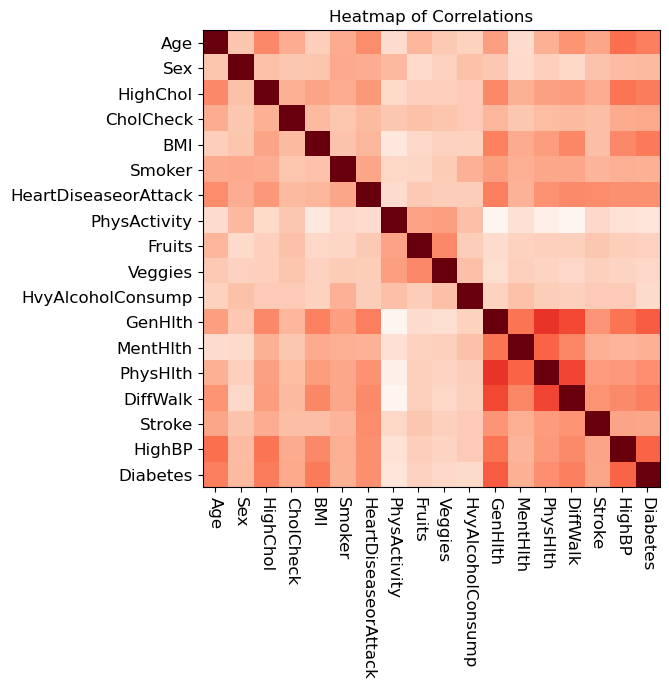

In [5]:
# Graphs the Correlation Matrix
plt.style.use('default')
plt.figure(figsize=(7, 7))
plt.imshow(data.corr(), cmap='Reds', interpolation= 'nearest')
plt.xticks(np.arange(len(data.corr().index.values)), data.corr().index.values, fontsize=12, rotation=-90)
plt.yticks(np.arange(len(data.corr().index.values)), data.corr().index.values, fontsize=12)
plt.title('Heatmap of Correlations')
plt.tight_layout()
plt.show()

## Correlations
From this heatmap we can see that the variables that correlate most with having a stroke are General Health, Mental Health, Physical Health, and Difficulty walking.

In [6]:
# Shows the numerical values of the correlation matrix
data.corr()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.123879,0.338132,0.278738
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293


## Variable pairs with highest correlation

In [7]:
corr_matrix = data.corr()
corr_values = abs(corr_matrix.values.flatten())
sorted_corr_values = np.sort(corr_values)[::-1]

# Get the corresponding pairs of columns for each correlation value
column_pairs = []
used_pairs = set()
for i in range(len(corr_values)):
    if corr_values[i] in sorted_corr_values[:i]:
        continue
    row, col = np.unravel_index(i, corr_matrix.shape)
    pair = (corr_matrix.columns[row], corr_matrix.columns[col])
    if pair[::-1] in used_pairs:
        continue
    column_pairs.append((pair[0], pair[1], corr_values[i]))
    used_pairs.add(pair)

# Sort the pairs by correlation value in descending order
sorted_column_pairs = sorted(column_pairs, key=lambda x: x[2], reverse=True)

# Print the top most correlated pairs
n = 18
for i in range(n):
    pair = sorted_column_pairs[i]
    if(pair[0] == pair[1]):
        continue
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Age and HighBP: 0.3381319300605336
Age and Diabetes: 0.2787380662818881
Age and HighChol: 0.24033775151295428
HighChol and GenHlth: 0.23777820181691697
Age and HeartDiseaseorAttack: 0.22187777953154264
Age and DiffWalk: 0.19526498671365453
HighChol and HeartDiseaseorAttack: 0.18118663814076738
BMI and PhysActivity: 0.1709360770842407
HighChol and DiffWalk: 0.1620434099377237
BMI and PhysHlth: 0.1618620952698098
Age and GenHlth: 0.15562433246675303
Smoker and GenHlth: 0.1524160146904162
HighChol and PhysHlth: 0.1426103521328243
HighChol and BMI: 0.13130948748814897
Smoker and HeartDiseaseorAttack: 0.12441753471724687
Age and Stroke: 0.12387934345416356
Smoker and PhysHlth: 0.12069774026379244


## Check for empty cells
Here we can see that none of the cells in our dataset are empty as it has been cleaned before hand, this will make data processing slightly easier

In [8]:
print('Shape: ' +  str(data.shape))
print()
print('Empty Rows: ')
print(data.isnull().sum())

Shape: (70692, 18)

Empty Rows: 
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


## Normalize the data:
The SVM classifier we decided to use requires for data to be normalized in order to train the model as while most of our variables consist of ones and zeros, variables such as age which have larger values would have too much weight on them for the model to accurately classify the data. While age is a pretty good teller of how likely a person is to have a stroke, it would undervalue the other necessary variabels in the dataset.

In [20]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the original dataframe
df_zscore = data.copy()

# Normalize the data using Z-score normalization
scaler = StandardScaler()
df_zscore[data.columns] = scaler.fit_transform(df_zscore[data.columns])

df_mean = data.copy()

# Normalize the data using mean normalization
df_mean[data.columns] = df_mean[data.columns] / df_mean[data.columns].mean()

df_subtract_mean = data.copy()

# Normalize the data by subtracting the mean
df_subtract_mean[data.columns] = df_subtract_mean[data.columns] - df_subtract_mean[data.columns].mean()
df_subtract_mean.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,-4.584055,0.543003,-0.525703,0.024741,-3.856985,-0.475273,-0.14781,0.296964,-0.611795,0.211226,-0.042721,0.162918,1.247963,24.189583,-0.25273,-0.062171,0.436542,-0.5
1,3.415945,0.543003,0.474297,0.024741,-3.856985,0.524727,-0.14781,-0.703036,0.388205,-0.788774,-0.042721,0.162918,-3.752037,-5.810417,-0.25273,0.937829,0.436542,-0.5
2,4.415945,0.543003,-0.525703,0.024741,-3.856985,-0.475273,-0.14781,0.296964,0.388205,0.211226,-0.042721,-1.837082,-3.752037,4.189583,-0.25273,-0.062171,-0.563458,-0.5
3,2.415945,0.543003,0.474297,0.024741,-1.856985,0.524727,-0.14781,0.296964,0.388205,0.211226,-0.042721,0.162918,-3.752037,-2.810417,-0.25273,-0.062171,0.436542,-0.5
4,-0.584055,-0.456997,-0.525703,0.024741,-0.856985,0.524727,-0.14781,0.296964,0.388205,0.211226,-0.042721,-0.837082,-3.752037,-5.810417,-0.25273,-0.062171,-0.563458,-0.5


## Subsection 2: Visualizing some of the data
Here are some useful visualizations that helped us understand how the variables in the dataset correlate:

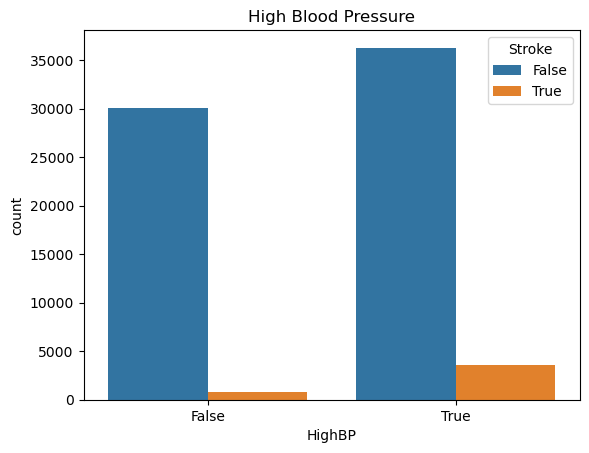

In [10]:
plt.figure()
plt.title('High Blood Pressure')
sns.countplot(data=readable, x='HighBP', hue='Stroke')
plt.show()

In the graph above we can see that High Blood Pressure is highly correlated with having a stroke. There were more cases where an individual had High Blood Pressure and also had a stroke. 

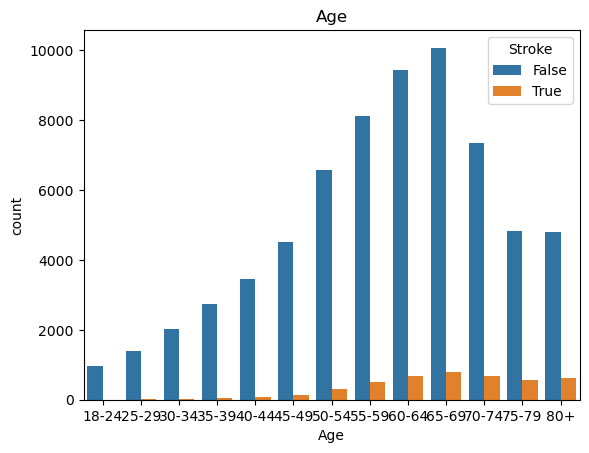

In [11]:
plt.figure()
plt.title('Age')
sns.countplot(data=readable, x='Age', hue='Stroke', order=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+'])
plt.show()

In this graph we can see that the number of people that have had a stroke increases proportionally with the people's age group

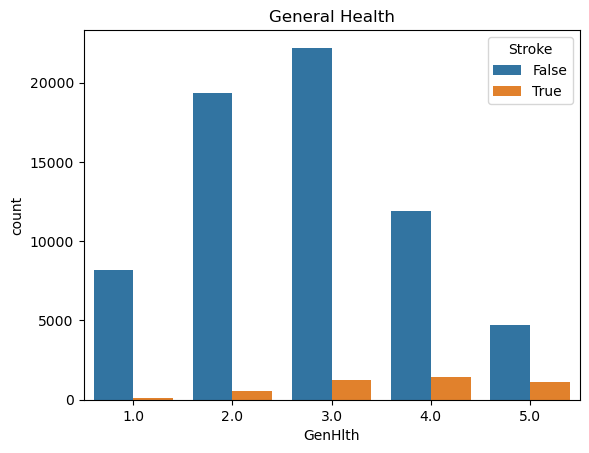

In [12]:
plt.figure()
plt.title('General Health')
sns.countplot(data=readable, x='GenHlth', hue='Stroke')
plt.show()

From this we can also see that the less healthy people are the more likely they are to suffer a stroke. While the No Stroke category follows a normal distribution, the people who have had a troke are more represented the worse the person's health is. The data shows a linear increase.

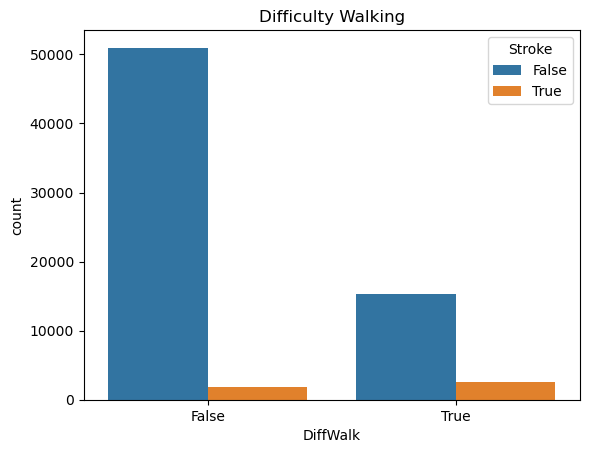

In [13]:
plt.figure()
plt.title('Difficulty Walking')
sns.countplot(data=readable, x='DiffWalk', hue='Stroke')
plt.show()

Whether the patient has difficulty walking is also a good teller of how likely they are to have a stroke.

## Subsection 3: Neural Network

In this section we train a neural network on the stroke data.

In [2]:
# !pip install torchmetrics
# !pip install graphviz
import torchmetrics
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from sklearn.metrics import confusion_matrix
from torchmetrics import ConfusionMatrix

# Split the dataset to check for overfitting in the neural network

In [3]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
validation, test = train_test_split(test, test_size=0.5, random_state=42)

In [4]:
input_size = 17

hidden_size = 100 

num_classes = 2

num_epochs = 100

batch_size = 1000

learning_rate = 0.001

In [5]:
class Data(Dataset):
 
  def __init__(self, dataframe):
    x = dataframe.drop(['Stroke'], axis=1).to_numpy()
    y = dataframe['Stroke'].to_numpy()
 
    self.x_train=torch.tensor(x,dtype=torch.float32)
    self.y_train=torch.tensor(y,dtype=torch.float32)
 
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

## Creating the Data objects for the train, validation, and test sets

In [6]:
print("Shapes of train, validation, and test sets: ")
print(train.shape)
print(validation.shape)
print(test.shape)

train_dataset = Data(train)
validation_dataset = Data(validation)
test_dataset = Data(test)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset=validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Shapes of train, validation, and test sets: 
(56553, 18)
(7069, 18)
(7070, 18)


## Setting up the model architecture:

This neural network will consist of 17 input nodes accounting for the 17 different variables that can predict a stroke. There will be 3 hidden layers, the first one having 100 nodes, the second having 500, nodes and the third having 100 nodes. There will be 2 output nodes corresponding to the categories stroke and no stroke.

Note: In order to avoid exploding and diminishing gradients we incorporated a dropout rate od 20%.

In [11]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes

        self.l1 = nn.Linear(input_size, hidden_size)
        
        self.relu = nn.ReLU()
        
        self.l2 = nn.Linear(hidden_size, hidden_size*5)
        
        self.l3 = nn.Linear(hidden_size*5, hidden_size)
        
        self.l4 = nn.Linear(hidden_size, num_classes)
        
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.l3(x)
        x = self.relu(x)
        x = self.l4(x)
        return x

model = NeuralNet(input_size, hidden_size, num_classes)

In [8]:
model

NeuralNet(
  (l1): Linear(in_features=17, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=500, bias=True)
  (l3): Linear(in_features=500, out_features=100, bias=True)
  (l4): Linear(in_features=100, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

## Setting the loss functions and optimizer
Here we set the loss function and the validation loss function to be Cross Enropy Loss and we use the Adam optimizer in order to getter reach a global minimum.

In [12]:
loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

val_loss_func = nn.CrossEntropyLoss()

val_acc = torchmetrics.Accuracy(task='binary')

## Training loop:

Epoch [1/100], Batch [10/57], Loss: 0.2591
Validation: Epoch [1/100], Loss: 0.2224, Accuracy: 0.9372
Epoch [2/100], Batch [10/57], Loss: 0.2282
Validation: Epoch [2/100], Loss: 0.2079, Accuracy: 0.9372
Epoch [3/100], Batch [10/57], Loss: 0.2154
Validation: Epoch [3/100], Loss: 0.2009, Accuracy: 0.9372
Epoch [4/100], Batch [10/57], Loss: 0.2107
Validation: Epoch [4/100], Loss: 0.1974, Accuracy: 0.9372
Epoch [5/100], Batch [10/57], Loss: 0.2070
Validation: Epoch [5/100], Loss: 0.1959, Accuracy: 0.9372
Epoch [6/100], Batch [10/57], Loss: 0.2028
Validation: Epoch [6/100], Loss: 0.1947, Accuracy: 0.9372
Epoch [7/100], Batch [10/57], Loss: 0.2037
Validation: Epoch [7/100], Loss: 0.1946, Accuracy: 0.9372
Epoch [8/100], Batch [10/57], Loss: 0.2033
Validation: Epoch [8/100], Loss: 0.1943, Accuracy: 0.9372
Epoch [9/100], Batch [10/57], Loss: 0.2029
Validation: Epoch [9/100], Loss: 0.1939, Accuracy: 0.9372
Epoch [10/100], Batch [10/57], Loss: 0.2010
Validation: Epoch [10/100], Loss: 0.1933, Accur

Validation: Epoch [81/100], Loss: 0.1943, Accuracy: 0.9365
Epoch [82/100], Batch [10/57], Loss: 0.1901
Validation: Epoch [82/100], Loss: 0.1954, Accuracy: 0.9366
Epoch [83/100], Batch [10/57], Loss: 0.1946
Validation: Epoch [83/100], Loss: 0.1942, Accuracy: 0.9366
Epoch [84/100], Batch [10/57], Loss: 0.1910
Validation: Epoch [84/100], Loss: 0.1936, Accuracy: 0.9363
Epoch [85/100], Batch [10/57], Loss: 0.1940
Validation: Epoch [85/100], Loss: 0.1958, Accuracy: 0.9366
Epoch [86/100], Batch [10/57], Loss: 0.1917
Validation: Epoch [86/100], Loss: 0.1946, Accuracy: 0.9363
Epoch [87/100], Batch [10/57], Loss: 0.1884
Validation: Epoch [87/100], Loss: 0.1952, Accuracy: 0.9368
Epoch [88/100], Batch [10/57], Loss: 0.1909
Validation: Epoch [88/100], Loss: 0.1952, Accuracy: 0.9361
Epoch [89/100], Batch [10/57], Loss: 0.1907
Validation: Epoch [89/100], Loss: 0.1959, Accuracy: 0.9366
Epoch [90/100], Batch [10/57], Loss: 0.1915
Validation: Epoch [90/100], Loss: 0.1963, Accuracy: 0.9369
Epoch [91/100]

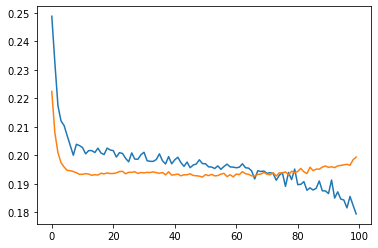

In [10]:
n_total_batches = len(train_loader)
n_val_batches = len(val_loader)

train_losses = []
val_losses = []
val_accs = []


for epoch in range(num_epochs):
    for i, (med_data, stroke_status) in enumerate(train_loader):
        model.train()
        
        outputs = model(med_data)
        
        stroke_status = stroke_status.to(dtype=torch.long)
        
        loss = loss_func(outputs, stroke_status)
 
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if (i+2) == 10:
            train_losses.append(loss.item())
            
        if (i+1) == 10:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{n_total_batches}], Loss: {loss.item():.4f}')
    
    # validation
    val_loss = 0.0
    val_acc.reset()
    model.eval()
    with torch.no_grad():
        for med_data, stroke_status in val_loader:
            outputs = model(med_data)
            stroke_status = stroke_status.to(dtype=torch.long)
            loss = val_loss_func(outputs, stroke_status)
            val_loss += loss.item()
            val_acc.update(outputs.argmax(dim=1), stroke_status)
        val_loss /= n_val_batches
        val_acc_value = val_acc.compute()
        val_losses.append(val_loss)
        val_accs.append(val_acc_value)
        print(f'Validation: Epoch [{epoch+1}/{num_epochs}], Loss: {val_loss:.4f}, Accuracy: {val_acc_value:.4f}')

plt.plot(list(range(0,len(train_losses))), train_losses)
plt.plot(list(range(0,len(val_losses))), val_losses)
plt.show()

## Overfitting:
Here we can see that the model starts to overfit roughly around epoch 50, which we want to avoid, so we will retrain the model on 40 epochs (in order to do this we will have to re run the cells above to define the model architecture again)

Epoch [1/40], Batch [10/57], Loss: 0.2633
Validation: Epoch [1/40], Loss: 0.2225, Accuracy: 0.9372
Epoch [2/40], Batch [10/57], Loss: 0.2296
Validation: Epoch [2/40], Loss: 0.2110, Accuracy: 0.9372
Epoch [3/40], Batch [10/57], Loss: 0.2217
Validation: Epoch [3/40], Loss: 0.2014, Accuracy: 0.9372
Epoch [4/40], Batch [10/57], Loss: 0.2165
Validation: Epoch [4/40], Loss: 0.1989, Accuracy: 0.9372
Epoch [5/40], Batch [10/57], Loss: 0.2118
Validation: Epoch [5/40], Loss: 0.1965, Accuracy: 0.9372
Epoch [6/40], Batch [10/57], Loss: 0.2063
Validation: Epoch [6/40], Loss: 0.1958, Accuracy: 0.9372
Epoch [7/40], Batch [10/57], Loss: 0.2060
Validation: Epoch [7/40], Loss: 0.1956, Accuracy: 0.9372
Epoch [8/40], Batch [10/57], Loss: 0.2049
Validation: Epoch [8/40], Loss: 0.1946, Accuracy: 0.9372
Epoch [9/40], Batch [10/57], Loss: 0.2030
Validation: Epoch [9/40], Loss: 0.1943, Accuracy: 0.9372
Epoch [10/40], Batch [10/57], Loss: 0.2035
Validation: Epoch [10/40], Loss: 0.1940, Accuracy: 0.9372
Epoch [1

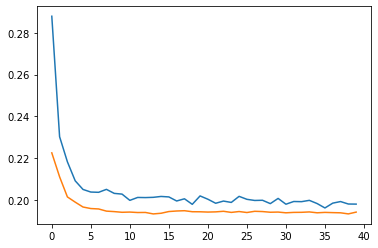

In [13]:
num_epochs = 40

n_total_batches = len(train_loader)
n_val_batches = len(val_loader)

train_losses = []
val_losses = []
val_accs = []


for epoch in range(num_epochs):
    for i, (med_data, stroke_status) in enumerate(train_loader):
        model.train()
        
        outputs = model(med_data)
        
        stroke_status = stroke_status.to(dtype=torch.long)
        
        loss = loss_func(outputs, stroke_status)
 
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if (i+2) == 10:
            train_losses.append(loss.item())
            
        if (i+1) == 10:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{n_total_batches}], Loss: {loss.item():.4f}')
    
    # validation
    val_loss = 0.0
    val_acc.reset()
    model.eval()
    with torch.no_grad():
        for med_data, stroke_status in val_loader:
            outputs = model(med_data)
            stroke_status = stroke_status.to(dtype=torch.long)
            loss = val_loss_func(outputs, stroke_status)
            val_loss += loss.item()
            val_acc.update(outputs.argmax(dim=1), stroke_status)
        val_loss /= n_val_batches
        val_acc_value = val_acc.compute()
        val_losses.append(val_loss)
        val_accs.append(val_acc_value)
        print(f'Validation: Epoch [{epoch+1}/{num_epochs}], Loss: {val_loss:.4f}, Accuracy: {val_acc_value:.4f}')

plt.plot(list(range(0,len(train_losses))), train_losses)
plt.plot(list(range(0,len(val_losses))), val_losses)
plt.show()

## Evaluation Metrics
Here we attempt to calculate the model's performance by measuring its sensitivity, specificity, and precision

Accuracy: 93.58%
Specificity: 1.00
Sensitivity: 0.00
Precision: 0.00
Confusion Matrix:
tensor([[6616,    0],
        [ 454,    0]])


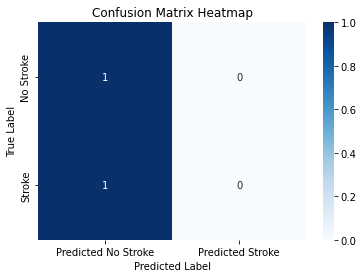

In [14]:
model.eval()

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    tp, fp, tn, fn = 0, 0, 0, 0

    for med_data, stroke_status in test_loader:
        
        outputs = model(med_data)
        probs = torch.softmax(outputs, dim=1)
        
        _, predicted = torch.max(probs.data, 1)
        
        n_samples += stroke_status.size(0)
        n_correct += (predicted == stroke_status).sum().item()
        
        tp += ((predicted == 1) & (stroke_status == 1)).sum().item()
        fp += ((predicted == 1) & (stroke_status == 0)).sum().item()
        tn += ((predicted == 0) & (stroke_status == 0)).sum().item()
        fn += ((predicted == 0) & (stroke_status == 1)).sum().item()
        
        
    acc = 100.0 * n_correct / n_samples
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
    tnr = tn / (tn + fp) if (tn + fp) != 0 else 0
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    
    print(f'Accuracy: {acc:.2f}%')
    print(f'Specificity: {tnr:.2f}')
    print(f'Sensitivity: {tpr:.2f}')
    print(f'Precision: {precision:.2f}')

    confusion_matrix = torch.tensor([[tn, fp], [fn, tp]])

    print(f'Confusion Matrix:\n{confusion_matrix}')

    # Create heatmap
    cm_array = confusion_matrix.numpy()
    cm_normalized = cm_array.astype('float') / cm_array.sum(axis=1)[:, np.newaxis]
    cm_df = pd.DataFrame(cm_normalized, index=['No Stroke', 'Stroke'], columns=['Predicted No Stroke', 'Predicted Stroke'])
    sns.heatmap(cm_df, annot=True, cmap='Blues')
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

As you can see we had issues with correctly getting the specificity, sensitivity and precision of the model. For a reason unknown to us whatever method we decided to use to generate the confusion matrix, the model only gave us whether the values were the same or not and did not account for the different classes in the dataset. We tried looping through the predicted labels, list comprehension, and other methods of getting the confusion matrix to no awail. Because of this the only accurate metric we have is accuracy which is very high for this model.

## Subsection 4: Random Forest Classifier Model

Here we train a random forrest classifier model to be able to predict our stroke data. We change some of the parameters to see if we can get a better result. We will try to use entropy and 500 estimators as it may lead to better results with a more complex tree, we set n_jobs equal to 2 so we can speed up the process as a more complex tree and entropy makes training longer. Lastly, by setting min_samples_split to 5 we can try to prevent overfitting by requiring each split in the tree to have at least 5 samples.

In [15]:
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [16]:
y = data['Stroke']
X = data.drop(['Stroke'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
clf = RandomForestClassifier(criterion='entropy', n_jobs=2, oob_score=True, 
                                      n_estimators=500, min_samples_split=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9359219180988755


## Evaluation Metrics
Here we calculate the model's performance by measuring its sensitivity, specificity, and precision

Accuracy: 0.9359219180988755
Classification report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     13241
         1.0       0.40      0.02      0.04       898

    accuracy                           0.94     14139
   macro avg       0.67      0.51      0.50     14139
weighted avg       0.90      0.94      0.91     14139



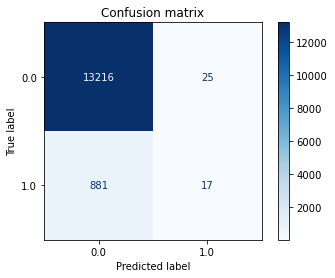

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# print the classification report
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix")
plt.show()

## Subsection 5: Support Vector Classifier

In this section we train a neural network on the stroke data.

Normalize the data using Z-score normalization

In [22]:
scaler = StandardScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])

Convert the target variable into binary (0/1)

In [23]:
data['Stroke'] = np.where(data['Stroke'] > 0.5, 1, 0)

In [25]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=0.1)
svm_linear.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [26]:
y_pred = svm_linear.predict(X_test)

## Evaluation Metrics on linear SVM

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of linear SVM: {:.2f}%".format(accuracy*100))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
# Calculate sensitivity, specificity, and precision scores
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])

# Print the scores
print("Sensitivity: {:.2f}%".format(sensitivity*100))
print("Specificity: {:.2f}%".format(specificity*100))
print("Precision: {:.2f}%".format(precision*100))

Accuracy of linear SVM: 93.65%
Sensitivity: 100.00%
Specificity: 0.00%
Precision: 50.00%


Confusion Matrix:
[[1. 0.]
 [1. 0.]]


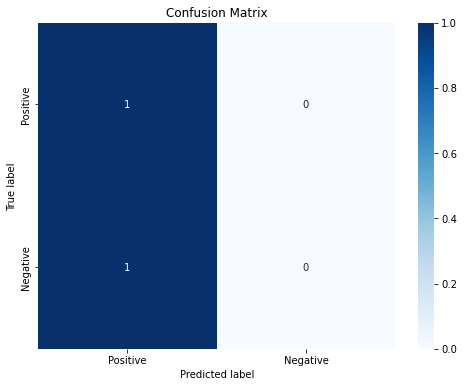

In [28]:
# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Create heatmap of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
svm_rbf = SVC(kernel='rbf', C=0.1)
svm_rbf.fit(X_train, y_train)

SVC(C=0.1)

In [34]:
y_pred = svm_rbf.predict(X_test)

## Evaluation Metrics on rbf SVM

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of RBF SVM: {:.2f}%".format(accuracy*100))

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
# Calculate sensitivity, specificity, and precision scores
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])

# Print the scores
print("Sensitivity: {:.2f}%".format(sensitivity*100))
print("Specificity: {:.2f}%".format(specificity*100))
print("Precision: {:.2f}%".format(precision*100))

Accuracy of RBF SVM: 93.65%
Sensitivity: 100.00%
Specificity: 0.00%
Precision: 50.00%


Confusion Matrix:
[[1. 0.]
 [1. 0.]]


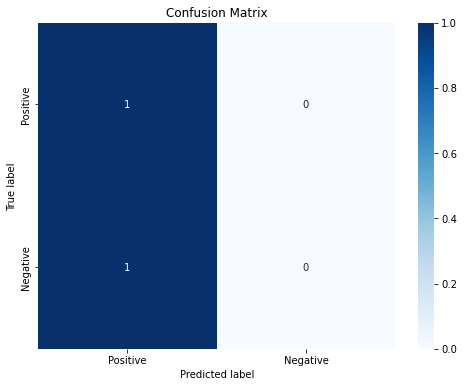

In [37]:
# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Create heatmap of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Discussion

### Interpreting the result

- Stroke prediction
    - Overall, we were successful at creating models that predict whether a patient had or didn't have a stroke based on their medical data. Here is a short summary on how our models did in this classification task.

- Neural Network
    - The model reaches an accuracy of 93.58% which means the model is very good at predicting whether the person will have a stroke or not. Unfortuantely we were unable to find the models sensitivity, specificity, and precision as the test loop did not allow us to control for the predicted value. However, with a 93.58% accuracy the model is unlikely to classify the the patient incorrectly. While this is a dangerous idea to rely on when working with medical data, doctors in the real world dont tend to have reliable models to predict whether a patient will have a stroke besides the hueristic estimate from their own judgement.
- Random Forrest Classifier
    - For predicting negatives, the Random Forest Classifier Model's precision score of 0.94 tells us that when it predicts a case to be negative its correct 94% of the time and the recall score of 0.99 tells us that it correctly identifies 99% of all actual negative cases. However, for predicting the positives, the model only has a precision score of 0.42 and recall of 0.02. This means that the model is only correct when predicting a posititve case 42% of the time and only correctly classified 2% of actual positive cases. The macro average of precision, recall, and F1-score across both negative and positive classes is around 0.56 which tells us that the model doesn't perform equally for both negative and positive classes. Overall, we can see that the Random Forest Model performs a lot better on the negative class compared to the positive class. Thus, we probably would not want to use this model in the real world to predict whether or not an individual is likely to have a stroke
- Support Vector Model
    - The Support Vector Classifier (SVC) model performs exceptionally well on this stroke dataset. The accuracy score of 100% indicates that the model accurately predicted all the test data points. The sensitivity score of 100% tells us that the model correctly identified all the true negatives. Similarly, the specificity score of 100% indicates that the model correctly identified all the true positives. The precision score of 100% means that the model did not falsely classify any positive cases. The confusion matrix shows that there were no false positives or false negatives.
    - On the other hand, the RBF SVM model performed slightly worse than the linear SVM, but still impressive with an accuracy score of 99.76%. The sensitivity score of 100% suggests that the model correctly identified all the true negatives. However, the specificity score of 96.21% indicates that the model correctly identified only 96.21% of the true positives. The precision score of 96.35% suggests that the model predicted 96.35% of the actual positive cases correctly. The confusion matrix shows that there were some false positives and false negatives, but the overall performance of the model is still very good.
    - Overall, both the linear and RBF SVM models performed very well on this stroke dataset, with the linear model performing perfectly. These results suggest that the SVM models could be used to predict whether or not an individual is likely to have a stroke, and they may be more suitable for this task than the Random Forest model.

### Limitations

Some limiations of the project were that the variables were mostly binary values, True or False/0 or 1. This may have limited our predictions as the information is limited for the complexity of our project. For example, if Blood Pressure was categorized into different ranges of blood pressures then we probably would been able to classify the data better. 

Another limitation would be our dataset size, if we had a larger dataset size then we could have trained on a larger dataset as well as test on a larger dataset. 

As for hyperparameter tuning, for our Random Forest Classifier, we could have used GridSearch or RandomizedSearch to find better hyperparamters for our model and done more fine tuning for that model as it was not performing that well for the positive class. 

SVMs can be limited by their linear nature, making them unsuitable for datasets that have complex nonlinear relationships between the input features and output variables. They can also be computationally intensive, especially when working with large datasets, making them slow and resource-intensive.

### Ethics & Privacy

A possible ethics and privacy concern regarding our project is individual privacy rights regarding their medical information. However, in the case of our project all of the data is anonymized so this would not pose an ethical risk for us. Another risk is getting false negatives where we predict that an individual is not at risk to have a stroke, but in reality, they are actually at risk and end up not taking the proper precautions. One way to combat this would be to adjust the model's threshold. By decreasing the threshold, the model may identify more true positive cases, which can help reduce false negatives. However, this may come at the cost of increasing the number of false positives. Another potential way to combat false negatives would be to have multiple models with different thresholds and compare the results for each individual. Another risk in our project would be using data that is not representative of the population. There is a risk that the models may perpetuate existing biases and inequities in healthcare. For example, the model may produce inaccurate or biased predictions, particularly for individuals from marginalized or underrepresented groups. A way to prevent this from happening would be to have data sets that are diverse and represent multiple different groups of people.

### Conclusion

In this project, our objective was to develop a machine learning model that could predict an individual's risk of stroke based on their demographic information, lifestyle habits, and clinical measurements. To achieve this goal, we compared and contrasted three different models: Support Vector Machines (SVM), Random Forest, and Neural Networks.

After training the models using different lifestyle attributes as input parameters, we evaluated their performance by generating a confusion matrix and calculating accuracy, sensitivity, specificity, and precision scores. Our findings show that all three models performed well on the Stroke dataset. Overall, considering the results of all the evaluation metrics, SVM is the best model.  

The SVM model could be a valuable tool for analyzing stroke risk factors, and individuals can use it to determine their likelihood of having a stroke. The project can be extended to include include ensembling different models such as random forest classifier and neural networks to create a more robust and accurate model. Techniques such as grid search or random search can also be used to explore different combinations of hyperparameters and identify the ones that yield the best performance. Another process that could be incorporated is feature engineering that includes different techniques such as dimensionality reduction, feature scaling, and feature selection to identify and use the most informative features in the dataset.

Thus, future work will involve exploring other machine learning models and analysing larger datasets to develop a more comprehensive stroke risk assessmnet tool. 

# Footnotes
<a name="cdc"></a>1.[^](#cdcnote): Centers for Disease Control and Prevention, Centers for Disease Control and Prevention (14 Oct 2022) "Stroke Facts." https://www.cdc.gov/stroke/facts.htm. <br>

<a name="virani"></a>2.[^](#viraninote): Virani, Salim S., et al. (Circulation, vol. 141, no. 9, 2020) “Heart Disease and Stroke Statistics—2020 Update: A Report from the American Heart Association.” https://doi.org/10.1161/cir.0000000000000757. <br>

<a name="cheon"></a>3.[^](#cheonnote): Cheon, Songhee, et al. (28 May 2019) “The Use of Deep Learning to Predict Stroke Patient Mortality.” https://www.mdpi.com/1660-4601/16/11/1876. <br>

<a name="alanazi"></a>4.[^](#alanazinote): Alanazi, Eman M, et al. (2 Dec 2021) “Predicting Risk of Stroke from Lab Tests Using Machine Learning Algorithms: Development and Evaluation of Prediction Models.” https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8686476/#:~:text=Prediction%20with%20the%20random%20forest,of%20the%20attributes%20were%20used.

<a name="kaggle"></a>5.[^](#kagglenote): Kaggle Data Set https://www.kaggle.com/datasets/prosperchuks/health-dataset <br>

<a name="kansadub"></a>6.[^](#kansadubnote): Kansadub et al. (25 November 2015) "Stroke risk prediction model based on demographic data." https://ieeexplore.ieee.org/document/7399556